In [244]:
#import dependencies
from scipy.optimize import curve_fit
from numpy.polynomial.polynomial import polyfit
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import csv
import scipy
from scipy.stats import linregress


In [245]:
#Set path to file
csvpath = 'winemag.csv'

In [246]:
#create a dataframe of the wine values
wine_df = pd.read_csv(csvpath)

#Drop rows with negative prices (???)
wine_df = wine_df.loc[wine_df["price"]>0]

In [247]:
#Sort the dataframe by country
wine_by_country_df = wine_df.groupby(['country'])
wine_by_country_df = wine_by_country_df.count()

In [248]:
#Remove countries with less than 1000 revieed bottles
top_wines_df = wine_by_country_df.loc[wine_by_country_df["title"]>1000, ["title"]]
top_wines_df.head()

,title
country,
Argentina,3120
Australia,1928
Austria,2399
Chile,3634
France,15136


In [249]:
#Drop unneeded columns...just to make reading/debugging easier
ploted_df = pd.merge(top_wines_df, wine_df, on="country").sort_values(by='country')
del ploted_df ['description']
del ploted_df ['designation']
del ploted_df ['province']
del ploted_df ['region_1']
del ploted_df ['region_2']
del ploted_df ['title_y']
del ploted_df ['taster_twitter_handle']
del ploted_df ['taster_name']
del ploted_df ['winery']
ploted_df.head()

,country,title_x,Unnamed: 0,points,price,variety
0,Argentina,3120,16,87.0,30.0,Malbec
2075,Argentina,3120,77050,87.0,16.0,Malbec
2076,Argentina,3120,77173,90.0,25.0,Malbec
2077,Argentina,3120,77208,82.0,12.0,Cabernet Sauvignon
2078,Argentina,3120,77210,82.0,17.0,Tempranillo


In [250]:
#Sort the new dataframe by country
country_ploted_df = ploted_df.sort_values(by='country', ascending=True)
country_ploted_df.head()

,country,title_x,Unnamed: 0,points,price,variety
0,Argentina,3120,16,87.0,30.0,Malbec
3,Argentina,3120,224,90.0,22.0,Malbec
4,Argentina,3120,231,85.0,10.0,Bonarda
5,Argentina,3120,245,85.0,12.0,Chardonnay
6,Argentina,3120,261,89.0,37.0,Red Blend


In [251]:
#Build a list of countries with more than 1000 wines...used to make the regression lines
country_list = country_ploted_df["country"].unique()
country_list

array(['Argentina', 'Australia', 'Austria', 'Chile', 'France', 'Germany',
       'Italy', 'New Zealand', 'Portugal', 'South Africa', 'Spain', 'US'],
      dtype=object)

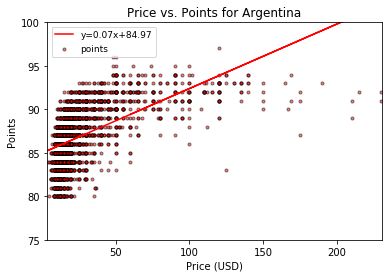

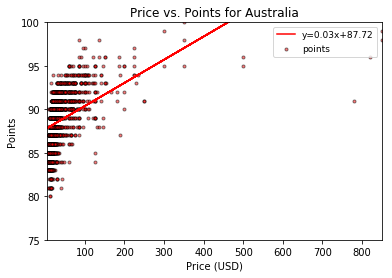

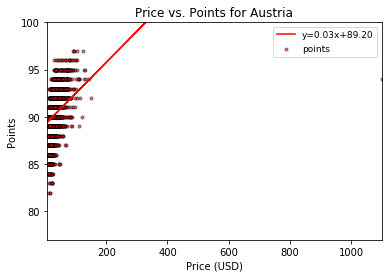

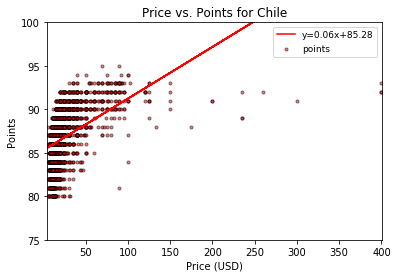

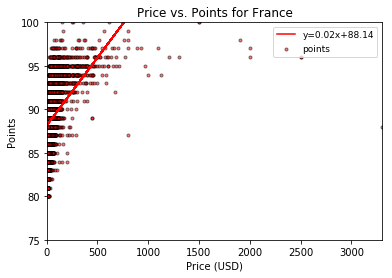

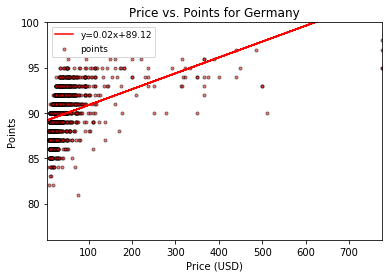

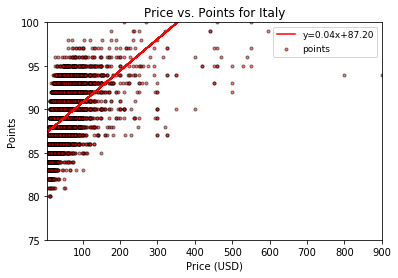

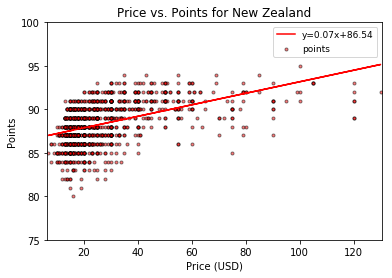

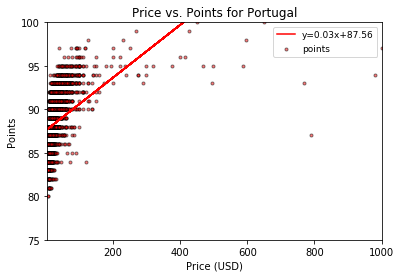

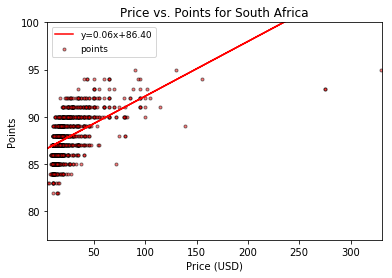

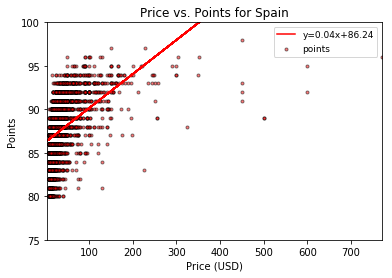

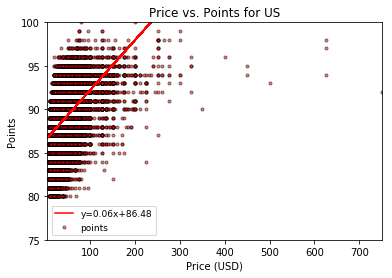

In [254]:
#Build linear regression
for country in country_list:
    
    #Create a temporary dataframe with just data from one country
    country_df = country_ploted_df.loc[country_ploted_df["country"]==country, ["country", "points", "price"]]
    points_list = country_df["points"]
    price_list = country_df["price"]
    
    #Set up labels
    title_string = "Price vs. Points for " + country
    plt.title(title_string)
    plt.xlabel("Price (USD)")
    plt.ylabel("Points")

    #Build scatterplot
    plt.scatter(price_list, points_list, marker=".", facecolors="red", edgecolors="black", alpha =0.5)

    # The x-axis and y-axis limits
    plt.xlim(price_list.min()-.5, price_list.max() + .5)
    plt.ylim(points_list.min() - 5, 100)

    #construct the regression line
    slope, intercept, r_value, p_value, std_err = linregress(price_list, points_list)

    #plot the line, graph, and eqation
    line = slope*price_list+intercept
    plt.plot(price_list, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
    plt.legend(fontsize=9)    
    plt.show()

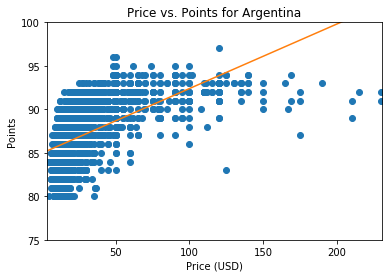

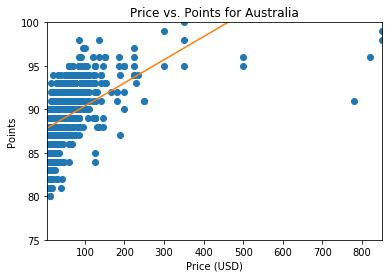

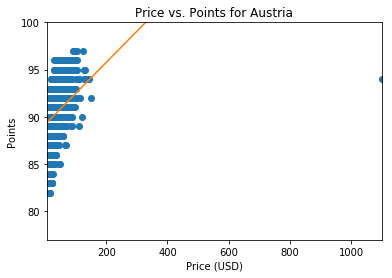

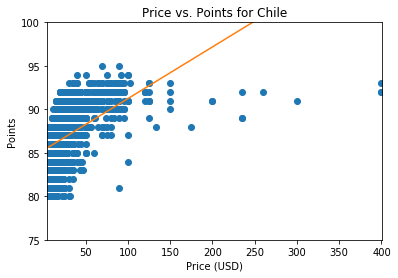

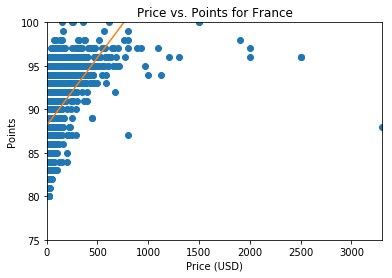

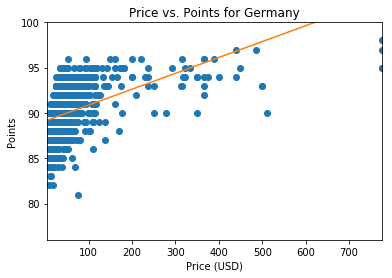

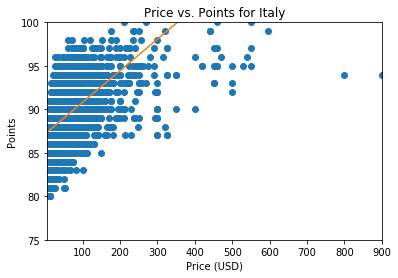

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

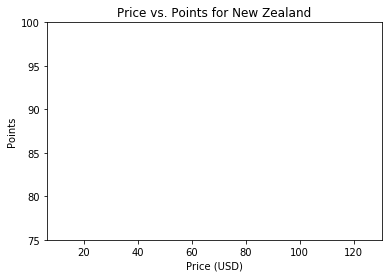

In [253]:
#Build logarithmic regression...not working as hoped yet :(
for country in country_list:
    country_df = country_ploted_df.loc[country_ploted_df["country"]==country, ["country", "points", "price"]]
    points_list = country_df["points"]
    price_list = country_df["price"]
    title_string = "Price vs. Points for " + country
    plt.title(title_string)
    plt.xlabel("Price (USD)")
    plt.ylabel("Points")
    
    # The x-axis and y-axis limits
    plt.xlim(price_list.min()-.5, price_list.max() + .5)
    plt.ylim(points_list.min() - 5, 100)

    #Define lists
    x = price_list
    y = points_list

    def exponenial_func(x, a, b, c):
        return a*np.exp(-b*x)+c
    popt, pcov = curve_fit(exponenial_func, x, y, p0=(1, 1e-6, 1))
    xx = np.linspace(price_list.min(), price_list.max(), 20)
    yy = exponenial_func(xx, *popt)
 
    plt.plot(x,y,'o', xx, yy)
    ax = plt.gca()
    fig = plt.gcf()
    plt.show()